# PREDICTING INCOME RANGE AS PER US CENSUS DATA


## Importing libraries and loading files

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

train = pd.read_csv("/Users/Junna/Desktop/us_census_full/census_income_learn.csv")
test =  pd.read_csv("/Users/Junna/Desktop/us_census_full/census_income_test.csv")


### Generating a list of variable names from the metadata

In [2]:
with open("/Users/Junna/Desktop/us_census_full/names.csv", 'r') as fp:
    names_list = fp.read().splitlines()
    
print(names_list)

['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks

## Cleaning the data

### Adding variable name for the target variable

In [3]:
names_list.append("income_range")

print(names_list[-1])

income_range


### Appending the header row to the raw file and dropping the "instance weight" column, since it's not a predictor variable as per the meta data

In [4]:
train.columns = names_list
test.columns = names_list

train.drop(['instance weight'], axis = 1, inplace = True)
test.drop(['instance weight'], axis = 1, inplace = True)

train.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income_range
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


### Checking for missing data

In [5]:
print(train.isnull().sum())
print(test.isnull().sum())


age                                          0
class of worker                              0
detailed industry recode                     0
detailed occupation recode                   0
education                                    0
wage per hour                                0
enroll in edu inst last wk                   0
marital stat                                 0
major industry code                          0
major occupation code                        0
race                                         0
hispanic origin                              0
sex                                          0
member of a labor union                      0
reason for unemployment                      0
full or part time employment stat            0
capital gains                                0
capital losses                               0
dividends from stocks                        0
tax filer stat                               0
region of previous residence                 0
state of prev

#### _No missing Data!_

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 41 columns):
age                                          199522 non-null int64
class of worker                              199522 non-null object
detailed industry recode                     199522 non-null int64
detailed occupation recode                   199522 non-null int64
education                                    199522 non-null object
wage per hour                                199522 non-null int64
enroll in edu inst last wk                   199522 non-null object
marital stat                                 199522 non-null object
major industry code                          199522 non-null object
major occupation code                        199522 non-null object
race                                         199522 non-null object
hispanic origin                              199522 non-null object
sex                                          199522 non-null object
member of

#### _A lot of data types need to be changed into categories_

### Changing variable to categorical where appropriate

In [7]:
cat_vars = ['class of worker',
'detailed industry recode',
'detailed occupation recode',
'education',
'enroll in edu inst last wk',
'marital stat',
'major industry code',
'major occupation code',
'race',
'hispanic origin',
'sex',
'member of a labor union',
'reason for unemployment',
'full or part time employment stat',
'tax filer stat',
'region of previous residence',
'state of previous residence',
'detailed household and family stat',
'detailed household summary in household',
'migration code-change in msa',
'migration code-change in reg',
'migration code-move within reg',
'live in this house 1 year ago',
'migration prev res in sunbelt',
'family members under 18',
'country of birth father',
'country of birth mother',
'country of birth self',
'citizenship',
'own business or self employed',
'fill inc questionnaire for veterans admin',
'veterans benefits',
'year']

for col in cat_vars:
    train[col] = train[col].astype('category')
    
for col in cat_vars:
    test[col] = test[col].astype('category')

### Looking into the numeric variables

In [8]:
#numeric variable list
num_varlist = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'weeks worked in year']

print(num_varlist)

['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'weeks worked in year']


### Basic statistics of the numeric columns

In [9]:
stats = train.groupby('income_range').describe()
pd.options.display.max_columns = None
stats

age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
income_range                                                                 
 - 50000.     187140.0  33.715106  22.620114   0.0  14.0  31.0  49.0  90.0   
 50000+.       12382.0  46.266193  11.830906  16.0  38.0  45.0  53.0  90.0   

             capital gains                                                 \
                     count         mean           std  min  25%  50%  75%   
income_range                                                                
 - 50000.         187140.0   143.848782   1815.348161  0.0  0.0  0.0  0.0   
 50000+.           12382.0  4830.930060  16887.627002  0.0  0.0  0.0  0.0   

                      capital losses                                         \
                  max          count        mean         std  min  25%  50%   
income_range                                                                  
 - 50000.     99999.0       187140.0   27.003874  229.535672  0.0  0.0  0.0   
 50000+.      99999.0        12382.0  193.139557  607.542507  0.0  0.0  0.0   

                          dividends from stocks                            \
              75%     max                 count         mean          std   
income_range                                                                
 - 50000.     0.0  4608.0              187140.0   107.817094   909.776614   
 50000+.      0.0  3683.0               12382.0  1553.448070  6998.071762   

                                            num persons worked for employer  \
              min  25%  50%    75%      max                           count   
income_range                                                                  
 - 50000.     0.0  0.0  0.0    0.0  39000.0                        187140.0   
 50000+.      0.0  0.0  0.0  363.0  99999.0                         12382.0   

                                                          wage per hour  \
                  mean       std  min  25%  50%  75%  max         count   
income_range                                                              
 - 50000.     1.820717  2.317621  0.0  0.0  0.0  4.0  6.0      187140.0   
 50000+.      4.003715  2.118183  0.0  2.0  4.0  6.0  6.0       12382.0   

                                                                 \
                   mean         std  min  25%  50%  75%     max   
income_range                                                      
 - 50000.     53.692813  261.169049  0.0  0.0  0.0  0.0  9916.0   
 50000+.      81.640284  431.364773  0.0  0.0  0.0  0.0  9999.0   

             weeks worked in year                                         \
                            count       mean        std  min   25%   50%   
income_range                                                               
 - 50000.                187140.0  21.527878  24.118222  0.0   0.0   0.0   
 50000+.                  12382.0  48.069617  12.259412  0.0  52.0  52.0   

                          
               75%   max  
income_range              
 - 50000.     52.0  52.0  
 50000+.      52.0  52.0

Mean age for income range 'Greater than 50k' is higher on an average than that of 'Less than 50k', which makes sense, since the data has a lot of young people still in school/college. Minimum age as zero does not make sense and makes the data noisy, we should get rid of those data points for better model performance. Capital gains and losses, dividends from stocks, number of persons worked for employers, wage per hour and weeks worked per year all have higher means for income level 'Greater than 50k', and it makes sense.

### Dropping rows where where age is zero

In [10]:
train.shape
test.shape

(99761, 41)

In [11]:
train = train[train.age != 0]
test = test[test.age != 0]

In [12]:
print(train.shape)
print(test.shape)

(196683, 41)
(98332, 41)


### Stripping extra space from the target variable values for operations later on

Stripping spaces in the income_range variable for less ambiguity

In [13]:
train['income_range'] = train['income_range'].str.strip()
test['income_range'] = test['income_range'].str.strip()


train.income_range.unique()

array(['- 50000.', '50000+.'], dtype=object)

### Creating a new target variable and removing raw target variable. Encoding "Income less than 50k" as 0 and "Income more than 50k" as 1

In [14]:
def recode_income(income):
    #print(income)
    if income == '- 50000.':
        return 0
    elif income == '50000+.':
        return 1

    return np.nan

# print(test.income_range)
train['inc_class'] = train.income_range.apply(recode_income)
train['inc_class'].head()

#Changing data type of the new target var
train['inc_class'] = train['inc_class'].astype('category')

#Dropping old target
train.drop( ['income_range'], axis = 1, inplace = True)


#Same treatment for test set

# print(test.income_range)
test['inc_class'] = test.income_range.apply(recode_income)
test['inc_class'].head()

#Changing data type of the new target var
test['inc_class'] = test['inc_class'].astype('category')

#Dropping old target
test.drop( ['income_range'], axis = 1, inplace = True)



### Plot of Target Variable

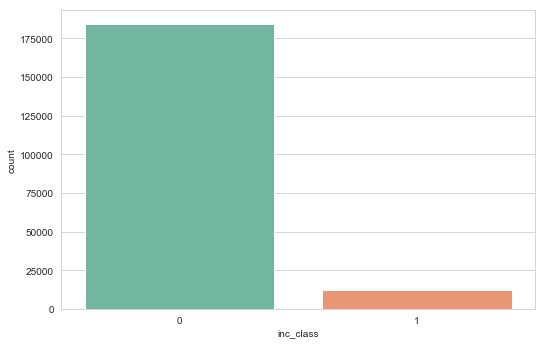

In [15]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (8.5, 5.5))

sns.countplot(x='inc_class', data= train, palette = 'Set2')
plt.show()

### Let's look at the class proportion of the target variable

In [16]:
count_low_inc = len(train[train['inc_class'] == 0])
count_high_inc = len(train[train['inc_class'] == 1])
pct_of_low_inc = count_low_inc/(count_low_inc + count_high_inc)
print("percentage of less than 50k is", pct_of_low_inc*100)
pct_of_high_inc = count_high_inc/(count_low_inc +count_high_inc)
print("percentage of more than 50k", pct_of_high_inc*100)

percentage of less than 50k is 93.70459063569297
percentage of more than 50k 6.295409364307032


The classes are imbalanced, and the ratio of "Less than 50k" to "Greater than 50k" instances is 94:6. We might need to balance the classes as the class imbalance might lead to vast inaccuracy when we try the model with the test set, we will come back to it after we see how the model performs on the test set.

### Visual EDA of Numeric Variables

In [17]:
def num_plots(data, feature):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize = (11, 5))
    fig.subplots_adjust(hspace=1.5)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)


    sns.boxplot(x = 'inc_class' ,y = feature,  data = data, palette = "Set3", ax = ax1 )
    sns.distplot(data[[feature]], color= "magenta", ax = ax2, kde = False)
   
    
    fig.suptitle("Boxplot and Data Distribution for %s " % feature, fontsize = 18)
    plt.show()

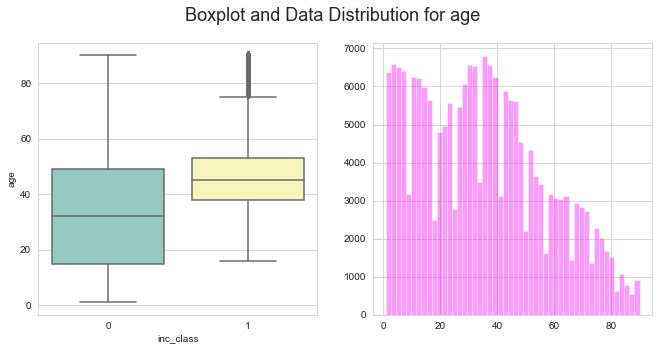

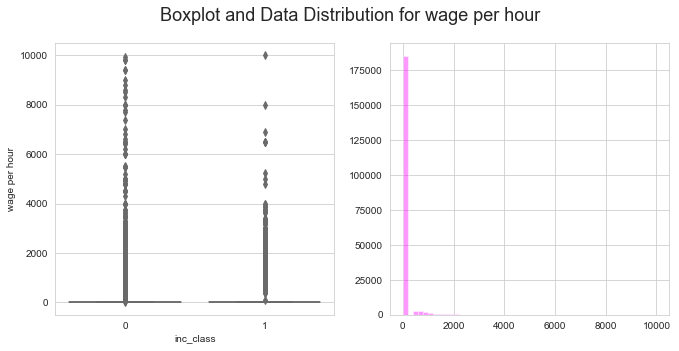

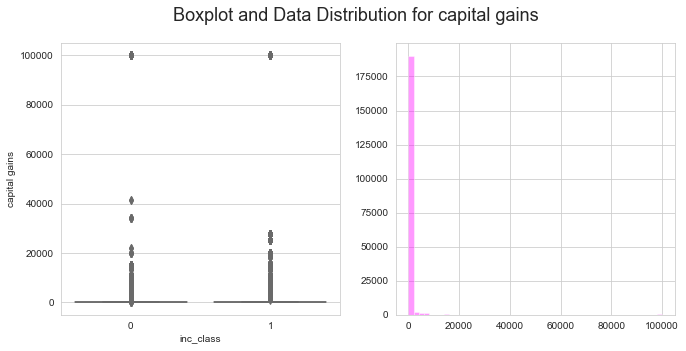

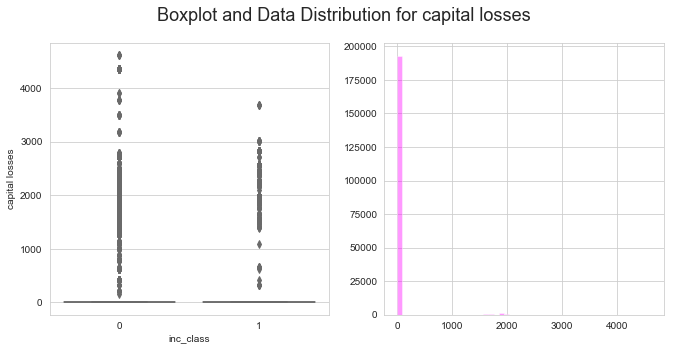

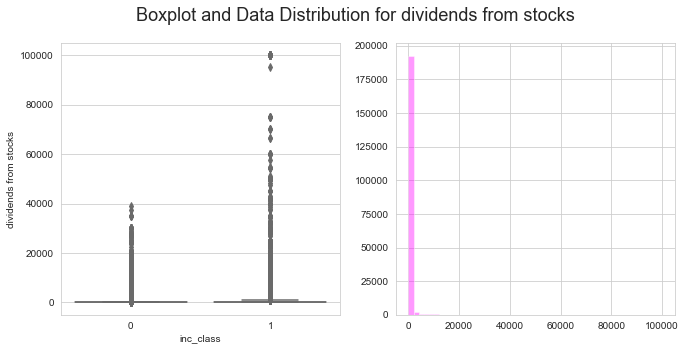

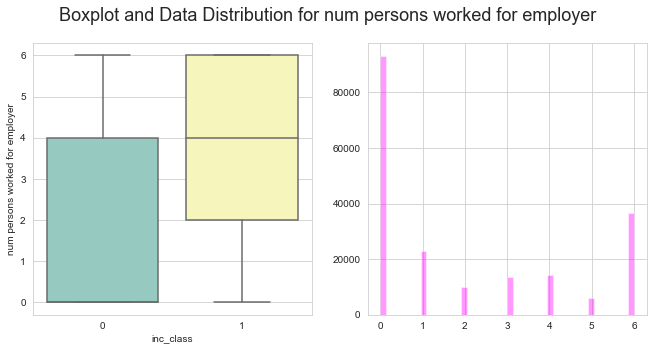

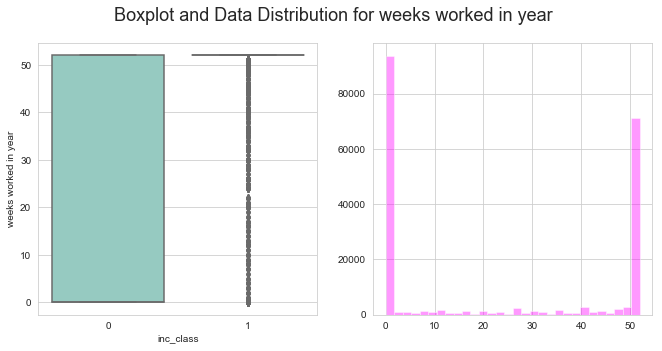

In [18]:
for feature in num_varlist:
    num_plots(train, feature)

Age: As seen in the previous summary statistics, high income range has an older demography compared to the lower income group. For the "Less than 50k" group, age range has a wider spread than "Greater than 50k" income group. The overall distribution of age is right skewed and is bimodal, with one peak of approximately  less than 20 years old and the other peak at around 40 years of age

Wage per hour, Capital gains, Capital Losses, Dividends from stocks: All of these variables are heavy tailed as seen in the box plots, meaning there are many extremities in these variables. A very big proprotion of the reads are very low or just 0 values, which accounts for the majority of the target population failling in the "Less than 50k" group. We should consider looking to the outliers and remove them for better model performance.

Number of persons worked for employer: As expected, "Greater than 50k" income range group has a higher number of "persons worked for employer" on an average than the lower income group. A big  portion values are close to zero

Weeks worked in a year: Most data lies in either the in zero range or the max range

### Looking at the Categorical Variables

In [19]:
def cat_plot(data, feature):
    table = pd.crosstab(data[feature], data.inc_class)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color = ['magenta', 'cyan'])
    plt.title('Stacked Bar Chart of %s' % feature )
    plt.xlabel('Income Class')
    plt.ylabel('Proportion of %s' % feature )
    plt.show()

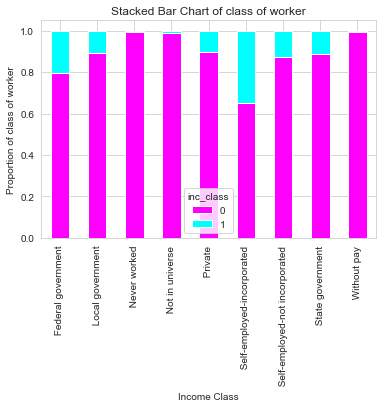

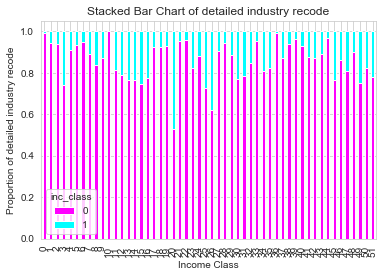

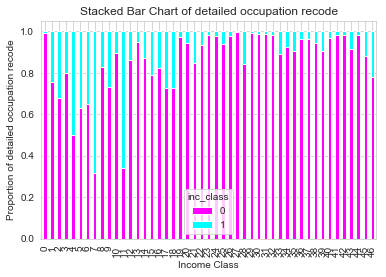

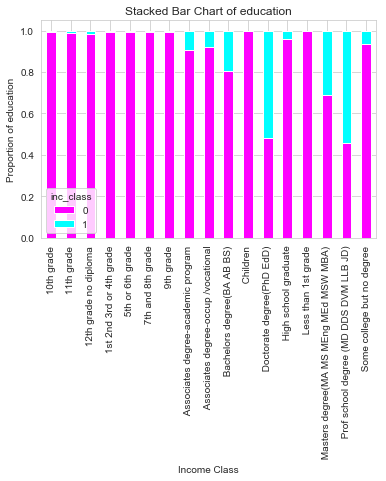

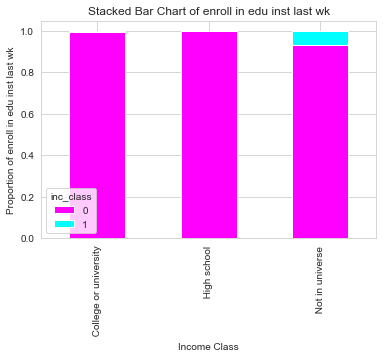

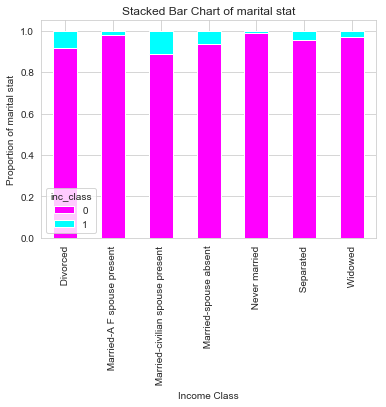

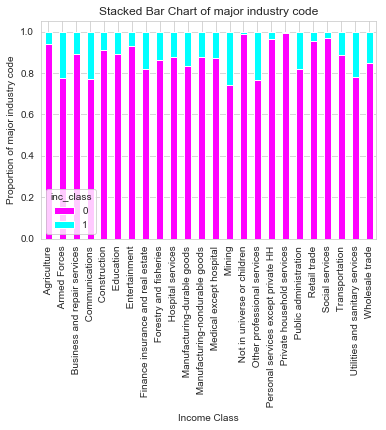

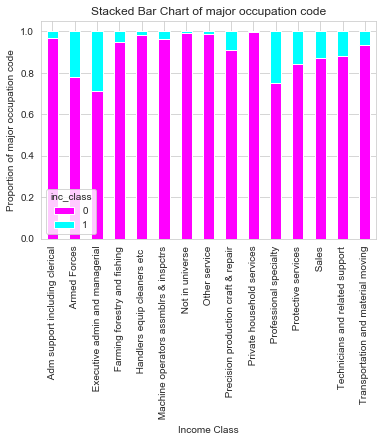

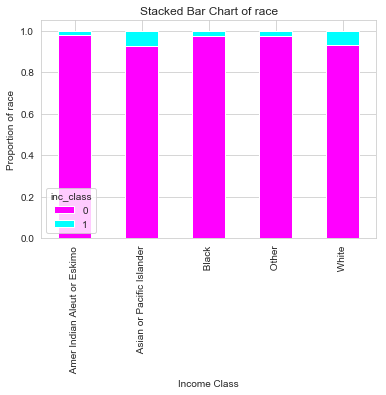

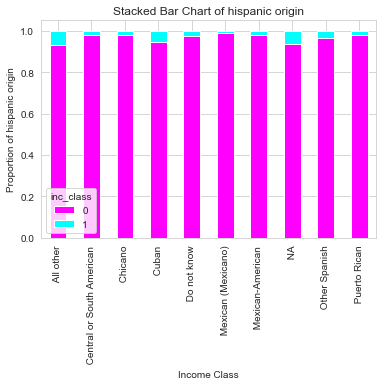

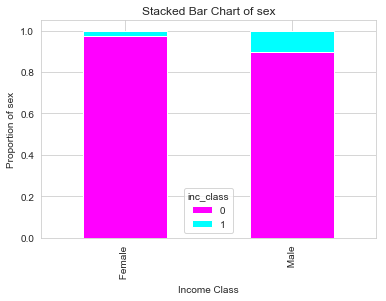

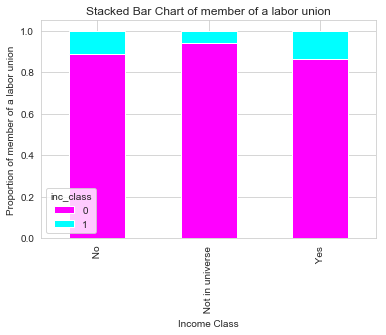

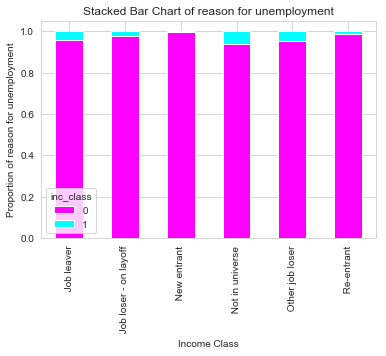

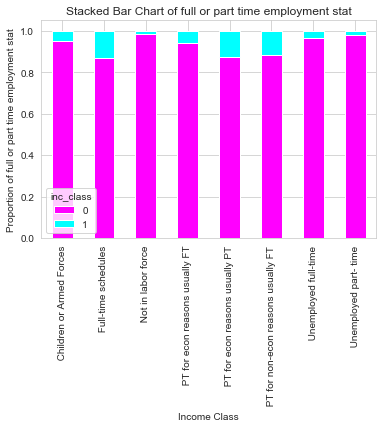

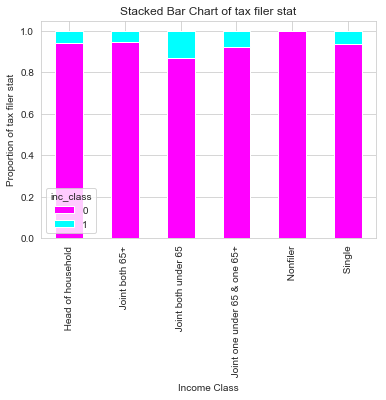

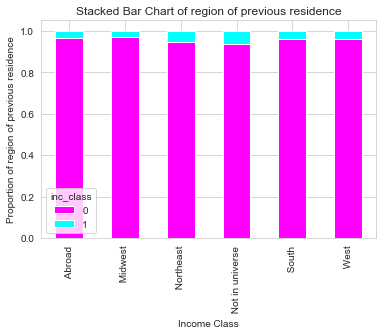

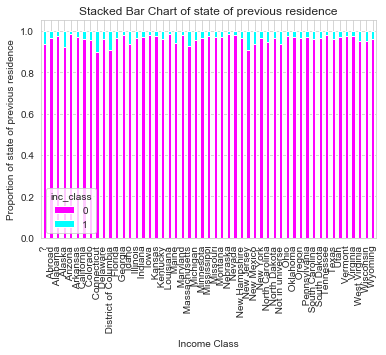

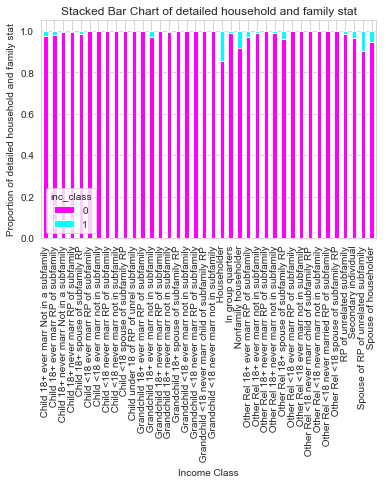

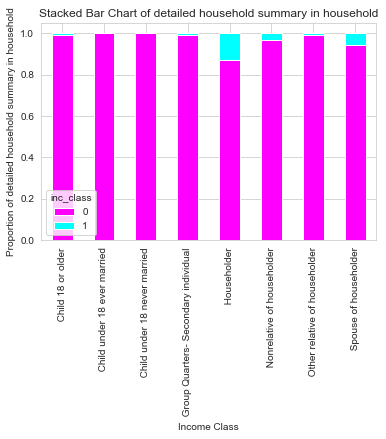

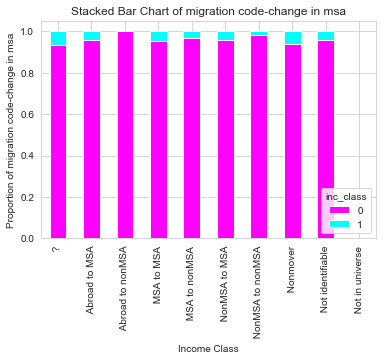

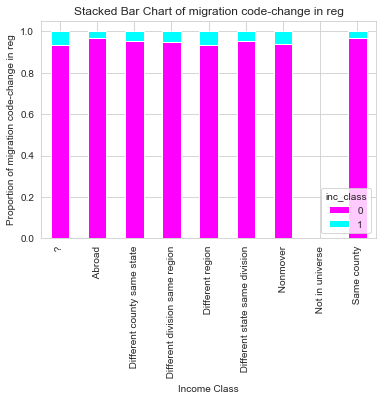

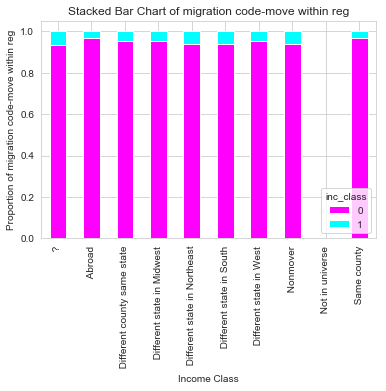

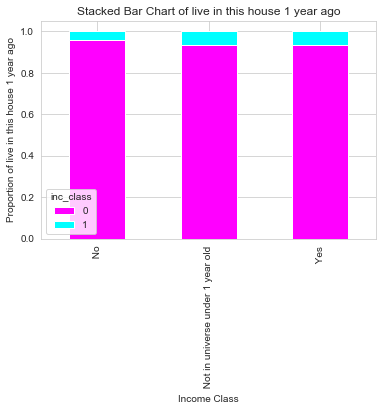

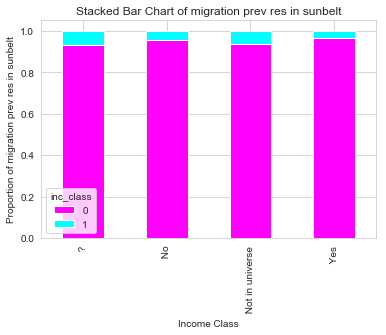

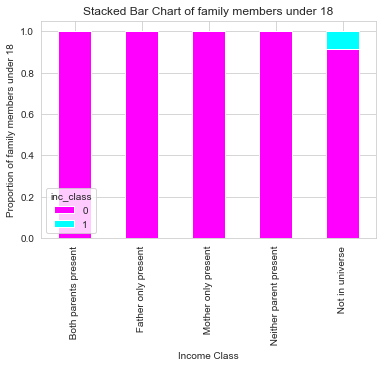

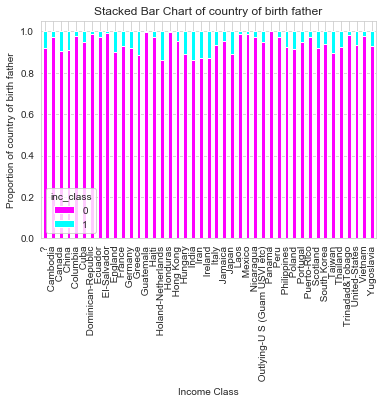

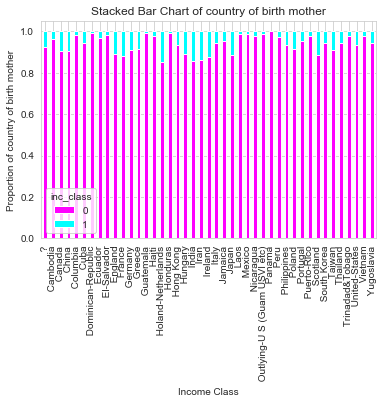

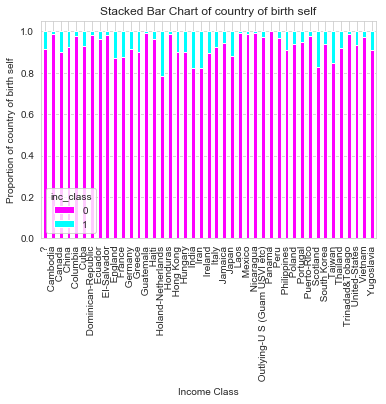

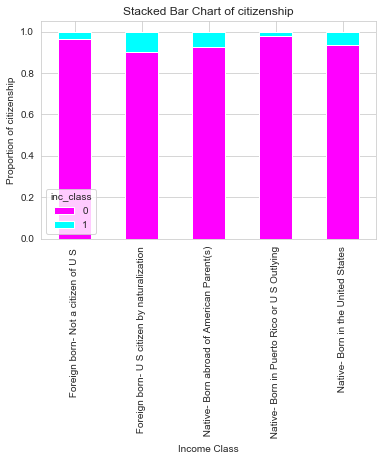

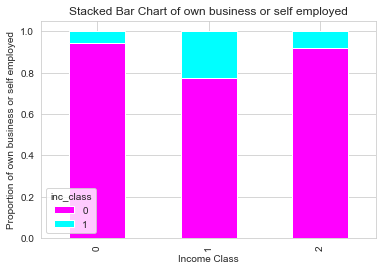

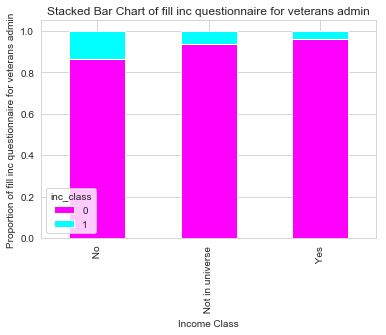

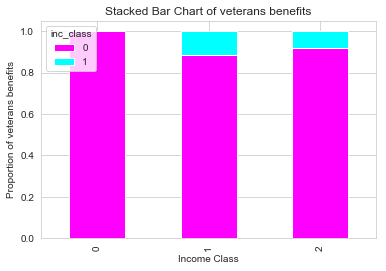

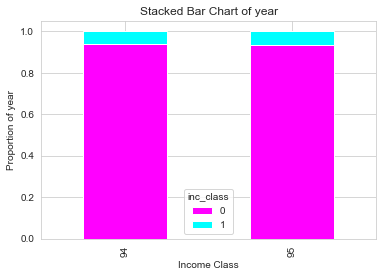

In [20]:
for feature in cat_vars:
    cat_plot(train, feature)

### Some interesting finds from the Stacked Bar Charts of the Categorical Variables

As seen in the plots above, the better portion of the stacked bars are comprised of the "Less than 50k" group due to the underlying class imbalance of the data

Class of Worker: Bigger part of the "never worked" or "worked without pay" category is comprised of "Less than 50k" group. A lot of "Greater than 50k" income group fall under "self-employed", "federal governmnet" and "private"

Detailed Occupation Recode and Industry Recode variable has a lot of levels, which might be a potential problem and we should put them in buckets and bring down the number of levels to 5 or 6. Moreover, these two variables might be multicollinear and one of them should be potentially removed.

A big chunk of "Greater than 50k" belongs to armed forces, executive level and have proffesional specialty skill sets. While occupations in private household services, admin support, transportation etc. have a lot of people from the "Less than 50k" group

Education: Higher income group has higher level of education. All of "Greater than 50k" group has an associate degree or higher. Asian or Pacific Islanders have the biggest portion in the "Greater than 50k" group. More males belong to the "greater than 50k" group than females, and vice versa for the lower income group.

Almost everyone in the "Greater than 50k" tier pay taxes. Most frequent tax file status for "Greater than 50k" income group is "Joint both under 65" and most frequent status for "Less than 50k" income group is "Nonfiler"

State/Region of previous residence does not have much variation between different locations, these two might be some of the less important variables

Majority of the "Greater than 50k" group are householders in the "household and family stat" variable

## Coding the categorical variables into dummies for Logistic Regression

In [21]:
dummies_train = pd.get_dummies(train[cat_vars])
#print(dummies_train.head())
print(dummies_train.shape)

dummies_test = pd.get_dummies(test[cat_vars])
#print(dummies_test.head())
print(dummies_test.shape)


(196683, 503)
(98332, 502)


By looking at the shape of the train set and the test set, we can see that in the test set, one of the levels in a category variable (now encoded as a dummy variable) must be missing, which is resulting in one less column in the test set. We need to get rid of this dummy variable from the train set.

In [22]:
tr_list = list(dummies_train.columns.values)
ts_list = list(dummies_test.columns.values)

(list(set(tr_list) - set(ts_list))) 

['detailed household and family stat_ Grandchild <18 ever marr not in subfamily']

Need to remove 'detailed household and family stat_ Grandchild <18 ever marr not in subfamily' from the train set

In [23]:
#since the dummy var 'detailed household and family stat_ Grandchild <18 ever marr not in subfamily' is not 
#present in the test set, we should remove this from the train set

dummies_train.drop(['detailed household and family stat_ Grandchild <18 ever marr not in subfamily'], axis = 1, inplace = True)
#dummies_test.drop(['detailed household and family stat_ Grandchild <18 ever marr not in subfamily'], axis = 1, inplace = True)


### Concatenating numeric and dummy variables together

In [24]:
final_train = pd.concat([dummies_train, train[num_varlist]], axis=1)
final_test = pd.concat([dummies_test, test[num_varlist]], axis=1)


In [25]:
print(final_test.shape)
print(final_train.shape)

(98332, 509)
(196683, 509)


## Fitting Logistic Regression to the data

### Creating Feature Cols and Target Variable

In [26]:
all_vars = final_train.columns.values.tolist()

y = train.inc_class
x = final_train.loc[:, final_train.columns != 'inc_class']

### Splitting X and y into training and validation sets

In [27]:
from sklearn.cross_validation import train_test_split

X_train,X_holdout,y_train,y_holdout=train_test_split(x,y,test_size=0.25,random_state=0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
y_holdout.head()

62        0
129265    0
74502     0
137730    0
130101    0
Name: inc_class, dtype: category
Categories (2, int64): [0, 1]

In [29]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

#print(y_train)

# fit the model with data
result = logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_holdout)

### Model Evaluation using Confusion Matrix

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_holdout, y_pred)
cnf_matrix

array([[45520,   495],
       [ 1902,  1254]])

The confusion matrix is presented in the form of an array object. Since this model is binary classification, the dimension of this matrix is 2*2 (we have two classes 0 and 1.)  Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 45520 and 1254 are actual predictions, and 495 and 1902 are incorrect predictions.

### Visualizing Confusion Matrix using Heatmap

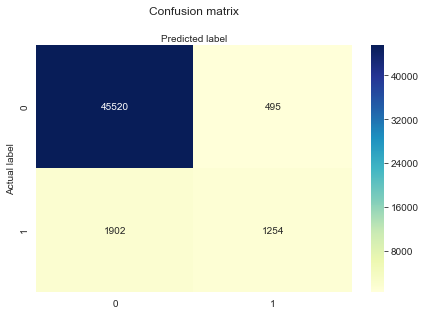

In [31]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


### Confusion Matrix Evaluation Metrics

In [32]:
print("Accuracy:",metrics.accuracy_score(y_holdout, y_pred))
print("Precision:",metrics.precision_score(y_holdout, y_pred))
print("Recall:",metrics.recall_score(y_holdout, y_pred))

Accuracy: 0.951251754083
Precision: 0.716981132075
Recall: 0.397338403042


Accuracy is the fraction of predictions our model got right. We have accuracy of 95%, which is considered as good accuracy. 

Precision: Precision is about how accurate the model is. In other words, what proportion of positive identifications was actually correct. In this prediction case, the model has a precision of 71.7% — i.e. when it predicts a person has income range "Greater than 50k", it is correct 71.7% of the time. So there's a lot of room for improvement. 

Recall: It answers what proportion of actual positives was identified correctly? This model has a recall of 0.397 — i.e. it correctly identifies 39.7% of the income class.

### ROC Curve

#### _Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity._

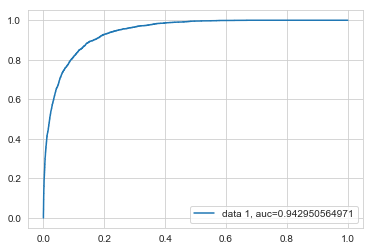

In [33]:
y_pred_proba = logreg.predict_proba(X_holdout)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_holdout,  y_pred_proba)
auc = metrics.roc_auc_score(y_holdout, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.94 which is very good. (AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.)

## Implementing Random Forest to the data

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Make predictions on holdout data
y_pred = clf.predict(X_holdout)

### Evaluating the Model

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_holdout, y_pred))

Accuracy: 0.951800858229


Accuracy of Random Forest model is ever so slightly better than the Logistic model. Let us try the Random Forest model on the test set now.

### RF on if test set

In [36]:
y_test = test.inc_class
X_test = final_test.loc[:, final_test.columns != 'inc_class']

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.952670544685


This is an unconventional case, with such high accuracy on the test set. 
We got lucky since both the training and the test set have imbalanced classes. But I doubt the model performance would be this great on a test set with balanced classes in the target variable

## Final Thoughts

The goal of this exercise was not to produce the most accurate model but if we wanted to, we could take further steps to make the models better.

The models could be further improved by getting rid of correlated and unimportant variables, getting rid of outliers, re-engeering the features etc. 

We could also take care of the imbalanced classes in the target variable by using algorithms such as SMOTE(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
- Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

To find the most important features for better prediction, the Random Forest package in fact, has a very nice feature selection function that lists the most important features. But that defeats the purpose of this exercise.